In [2]:
# Feel free to use this notebook for any data exploration you feel is useful

import interview_test_final
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [3]:
data_path = 'C:/Users/Ying-Fang.Kao/Documents/interview-test-final-stats-causalinference/data/dataset.csv'
data = pd.read_csv(data_path, index_col = 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13599 entries, 1004889 to 1017676
Data columns (total 17 columns):
age                       13178 non-null float64
workclass                 13056 non-null object
salary                    13177 non-null float64
education_rank            13599 non-null int64
marital-status            13599 non-null object
occupation                13056 non-null object
race                      13599 non-null object
sex                       13599 non-null object
mins_beerdrinking_year    13175 non-null float64
mins_exercising_year      13178 non-null float64
works_hours               13599 non-null int64
tea_per_year              11170 non-null float64
coffee_per_year           11188 non-null float64
great_customer_class      13599 non-null int64
test                      13599 non-null int64
spent_17                  13599 non-null float64
spent_18                  13599 non-null float64
dtypes: float64(8), int64(4), object(5)
memory usage: 1.9+ MB


In [6]:
data.describe()

,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18
count,13178.000000,13177.000000,13599.000000,13175.000000,13178.000000,13599.000000,11170.000000,11188.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,44.842009,37149.297355,10.675417,447.920607,46.034224,39.916317,217.276544,359.708169,0.085889,0.160747,57.586659,68.252595
std,16.050574,24316.155119,2.224582,4782.134102,294.234126,9.839082,113.944411,164.680579,0.280210,0.367311,22.163776,22.149991
min,14.000000,4872.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-37.429405,-28.717547
25%,30.000000,20885.500000,9.000000,0.000000,0.000000,40.000000,175.000000,223.750000,0.000000,0.000000,43.188219,54.076651
50%,50.000000,25912.750000,12.000000,0.000000,0.000000,40.000000,175.000000,447.000000,0.000000,0.000000,57.586659,68.252595
75%,59.000000,48908.750000,12.000000,0.000000,0.000000,40.000000,276.000000,499.000000,0.000000,0.000000,71.659694,82.820437
max,90.000000,363858.750000,16.000000,99999.000000,3900.000000,99.000000,499.000000,499.000000,1.000000,1.000000,139.361785,152.124433


In [17]:
# missing values
num_obs = data.shape[0]
for column in data:
    missing_ratio = sum(data[column].isna())/num_obs
    print('Percentage of missing values in column {} is {} '.format(column, missing_ratio))

Percentage of missing values in column age is 0.030958158688138834 
Percentage of missing values in column workclass is 0.039929406574012796 
Percentage of missing values in column salary is 0.031031693506875506 
Percentage of missing values in column education_rank is 0.0 
Percentage of missing values in column marital-status is 0.0 
Percentage of missing values in column occupation is 0.039929406574012796 
Percentage of missing values in column race is 0.0 
Percentage of missing values in column sex is 0.0 
Percentage of missing values in column mins_beerdrinking_year is 0.03117876314434885 
Percentage of missing values in column mins_exercising_year is 0.030958158688138834 
Percentage of missing values in column works_hours is 0.0 
Percentage of missing values in column tea_per_year is 0.17861607471137583 
Percentage of missing values in column coffee_per_year is 0.17729244797411575 
Percentage of missing values in column great_customer_class is 0.0 
Percentage of missing values in 

c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


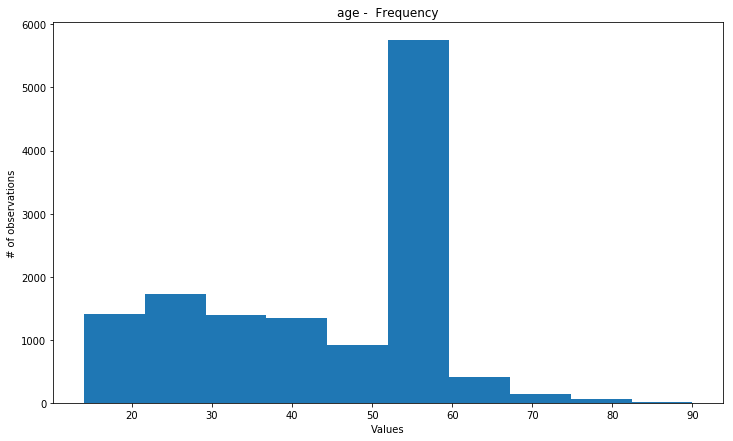

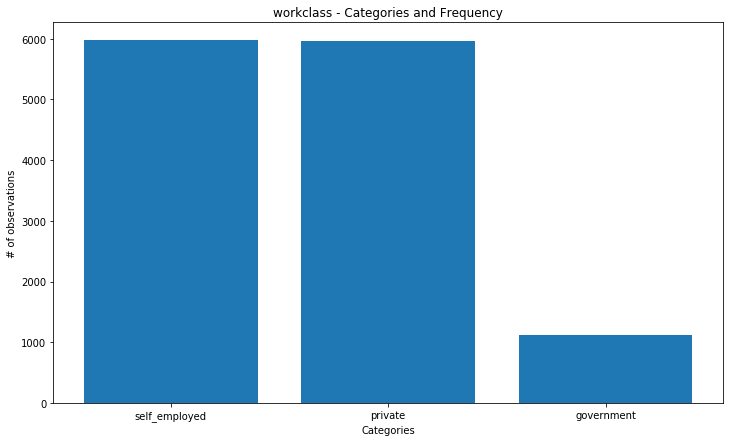

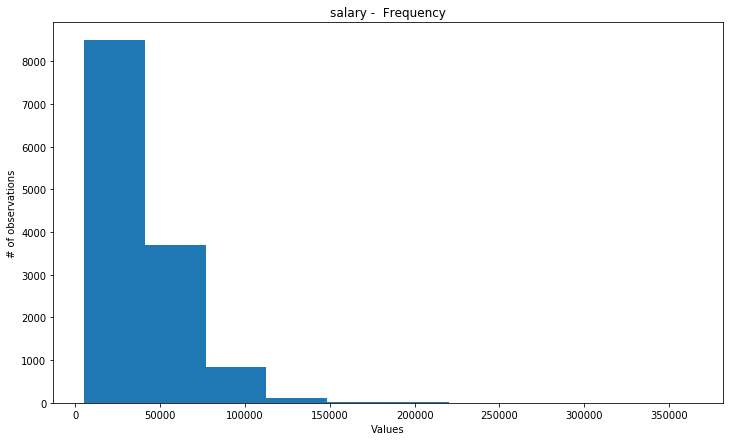

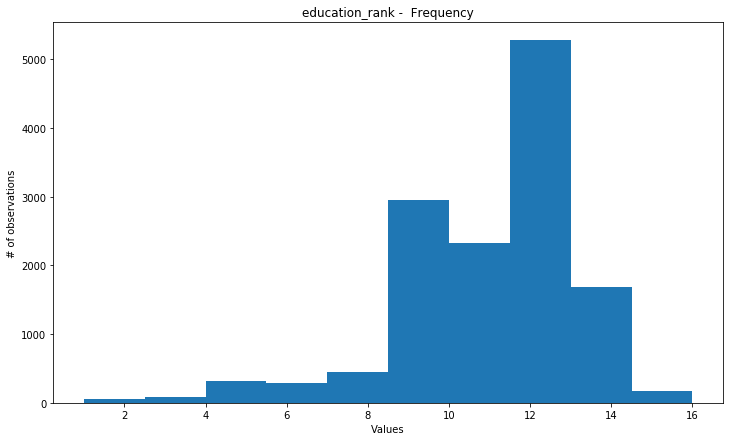

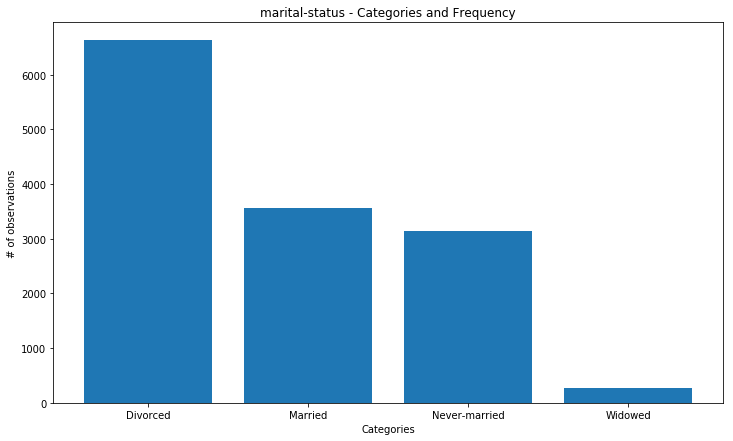

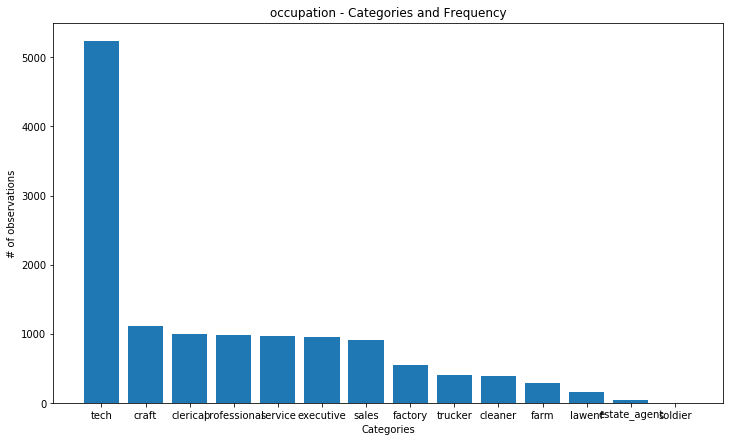

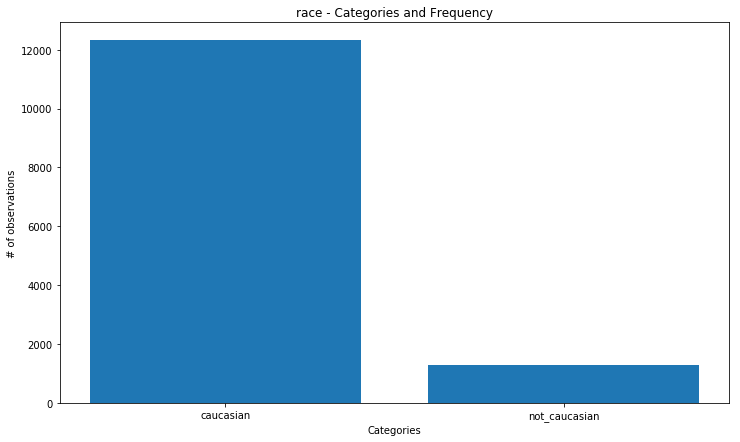

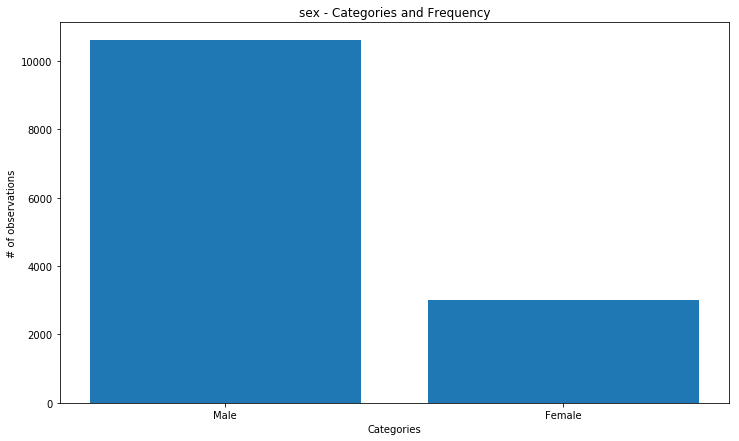

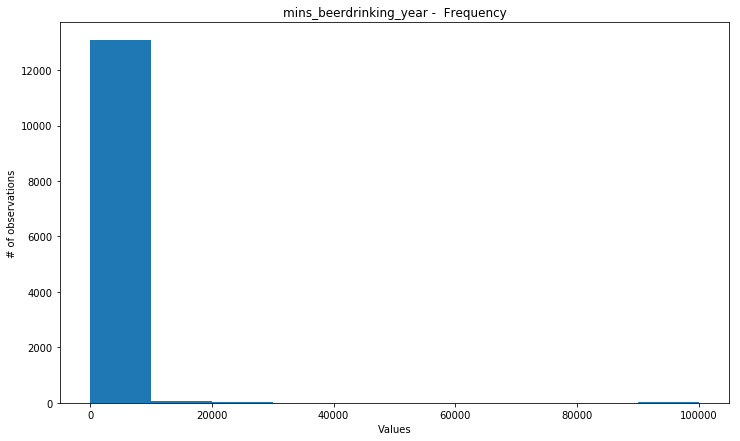

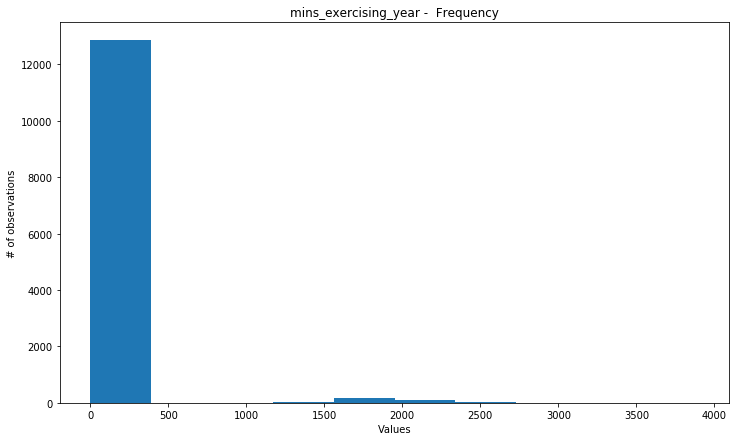

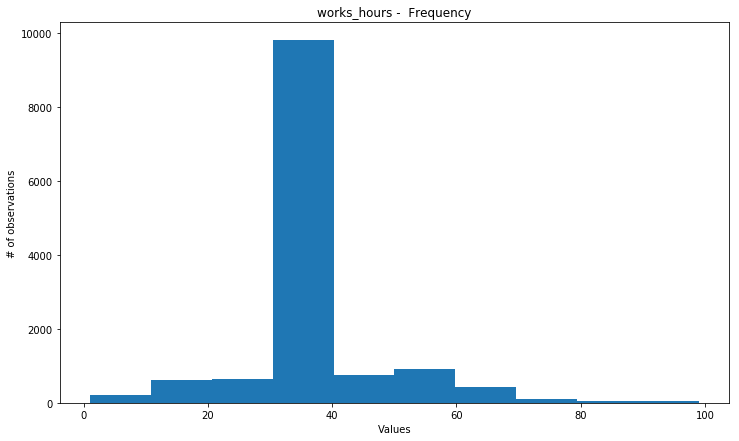

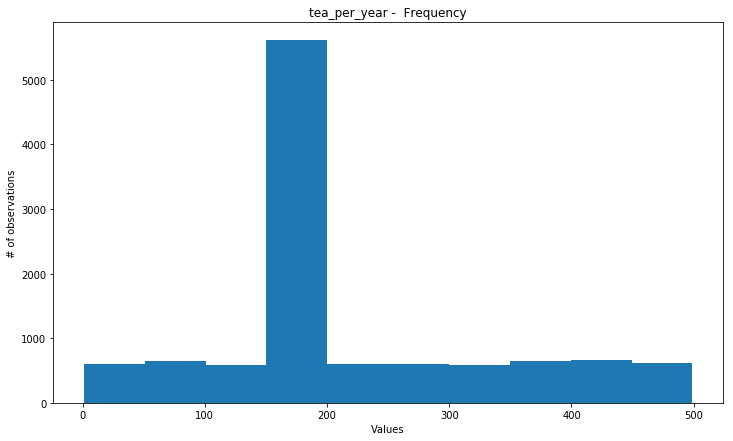

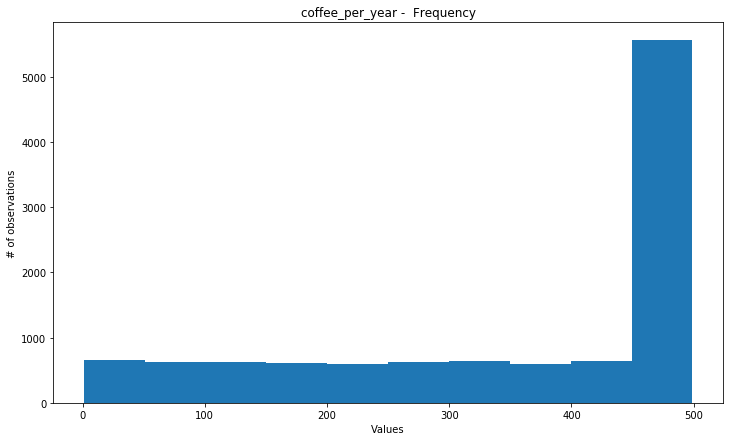

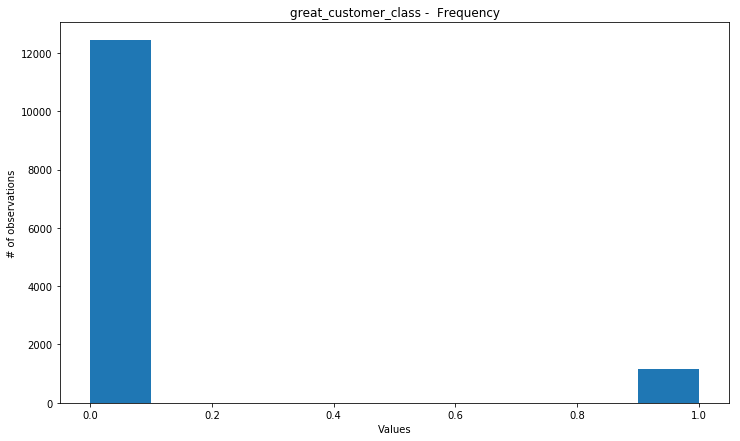

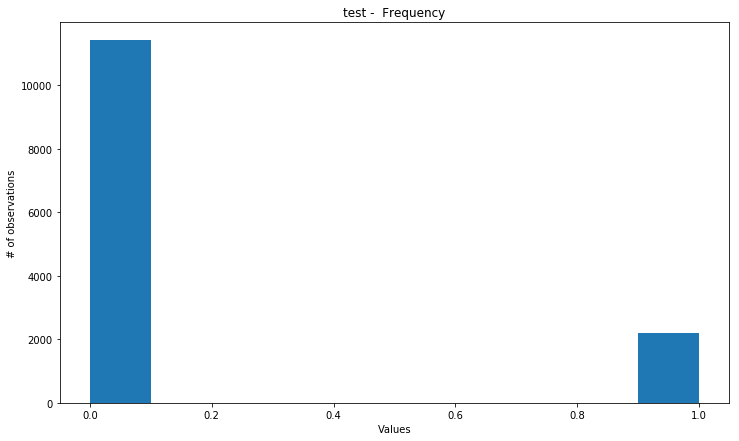

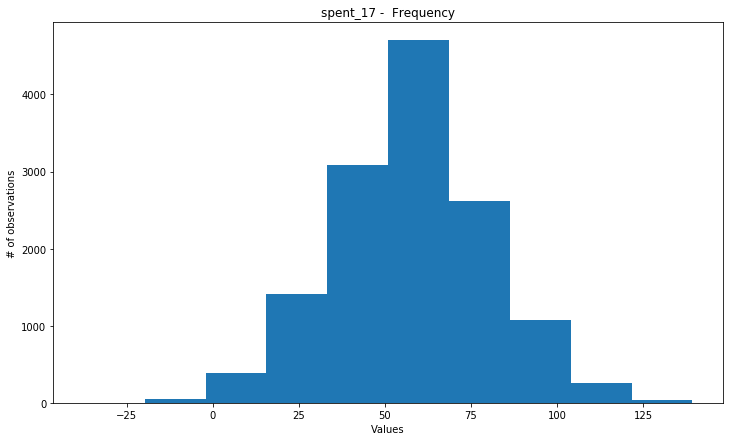

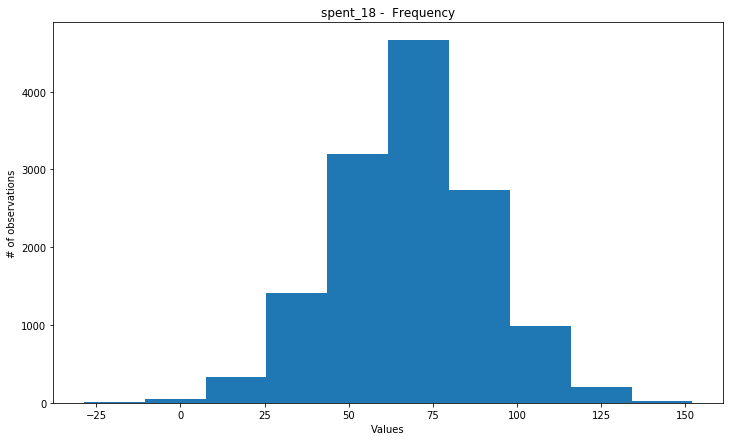

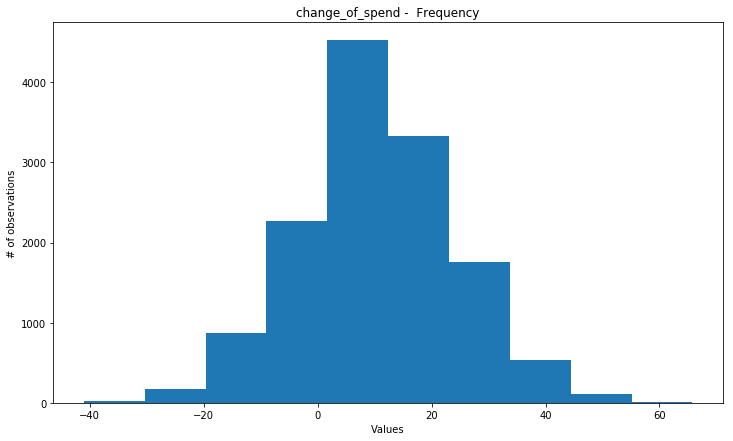

In [13]:
# Data Distributions Visualisation
category_columns = []
for column in data:
    if data.dtypes[column] == 'object':
        category_columns.append(column)
        
for column in data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(data[column])

correlation coefficient of spend and change_of_spend is [[ 1.        -0.3102423]
 [-0.3102423  1.       ]]


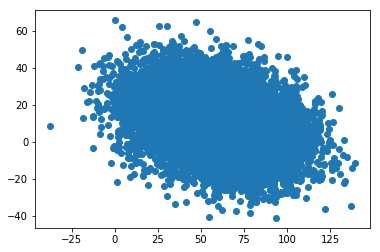

In [12]:
# Change of Spend
data['change_of_spend'] = data['spent_18'] - data['spent_17']

# Can change of spend be negatively correlated with spent_17 ?
#(beyond a saturation point, one will not spend more even with marketing?)

plt.scatter(data['spent_17'], data['change_of_spend'])

print('correlation coefficient of spend and change_of_spend is {}'.format(data[['spent_17','change_of_spend']].corr().values))

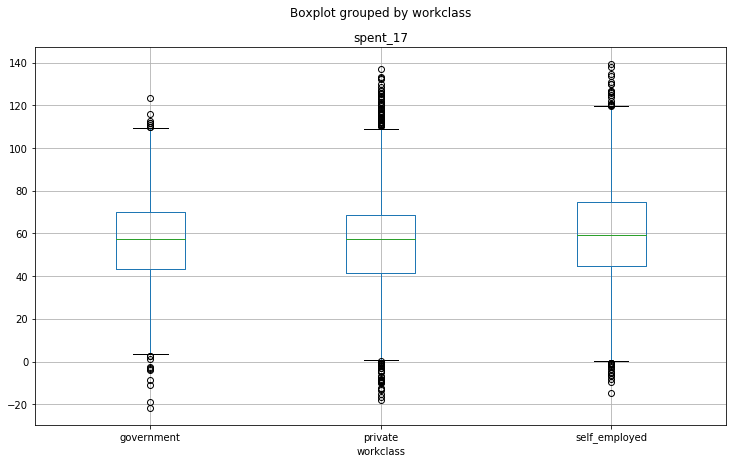

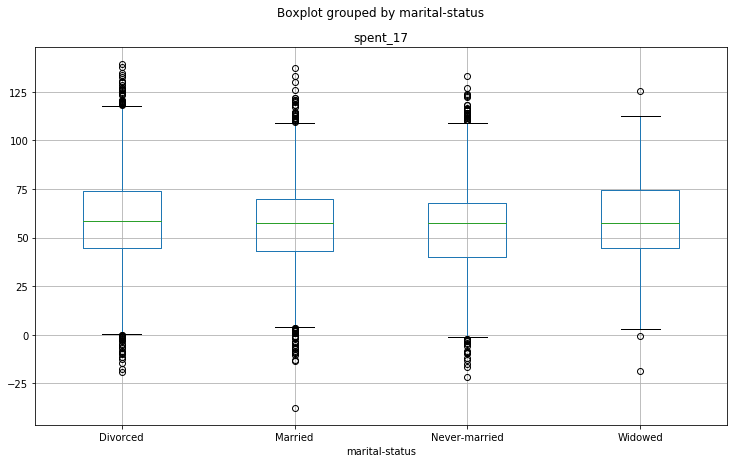

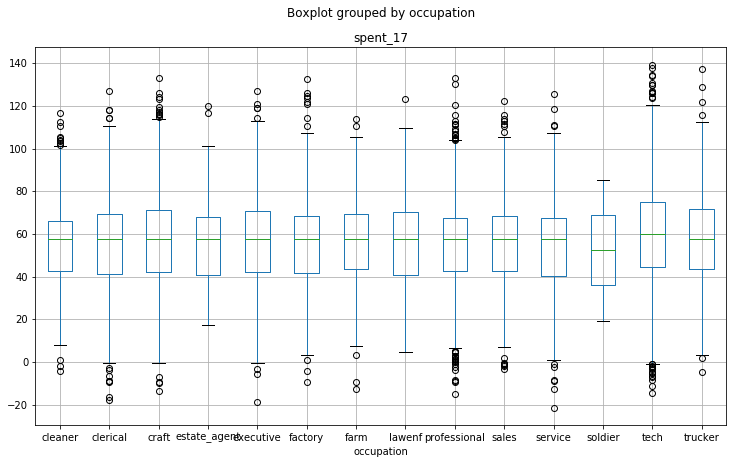

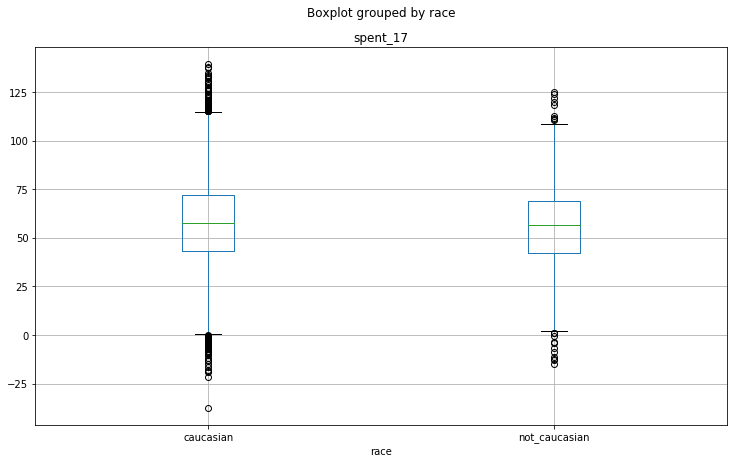

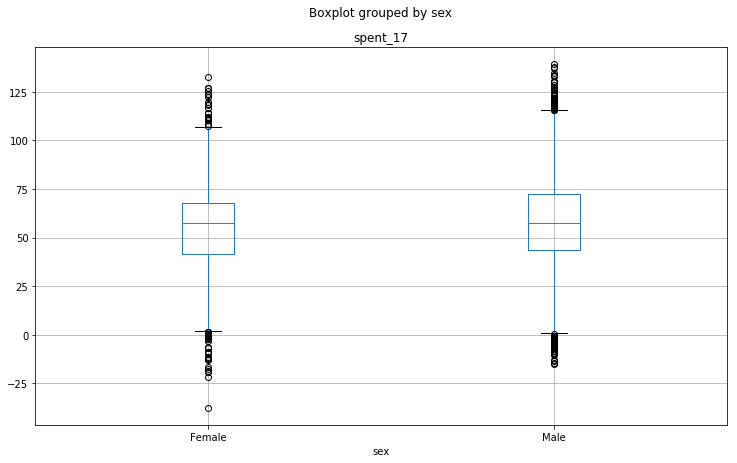

In [15]:
# How do spend differ when looking at different user attributes
for column in category_columns:
    data.boxplot(column = 'spent_17', by = column, figsize = (12,7))

# Part A: Programming and Machine Learning

In [ ]:
'''
Use Python (preferably 3) please, that is what the team works in and we can’t accept submissions
 written in other languages.
 
 There is some existing code (only a couple classes) that we would like you to use. Use the abstract
classes provided for your models and data loader.


Write a unit test for something. We don’t really mind what, even if you just write a test for the
###checking the file exists or loading it, we’ll be happy.

Predict the binary class ‘great_customer_class’ using two prediction models. Use a random forest,
then afterwards a second approach of your choice. This could be something to show your knowledge
about problem datasets like support vector machines, or could be something fancy like NN.

Determine ways to evaluate your prediction model.
Outline any concerns with the data and how you approached them.

Explain the dominant features for classifiers if it’s possible.
'''

# Part B: Statistics and Causal Inference

##  Q1: Does Personalised Marketing Change the Spend?

In [ ]:
# it looks like the distribution of change of spend in the treatment group is similar of that in control group


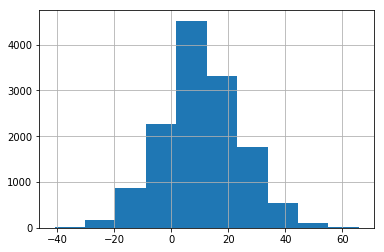

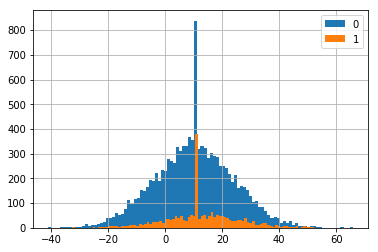

In [39]:


# overall change regardless of test
data['change_of_spend'].hist()
# group by test
plt.figure()
for test_groups , frames in data.groupby('test'):
    frames['change_of_spend'].hist(bins = 100)
    
plt.legend(data['test'].value_counts().index)    

## Q2:  Experiment Set up

c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


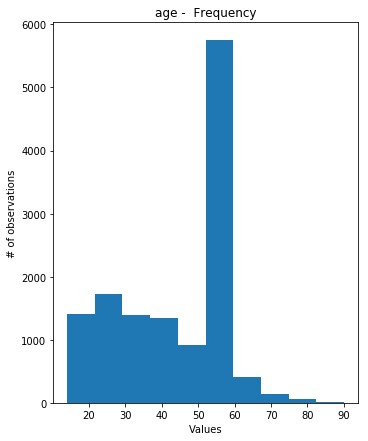

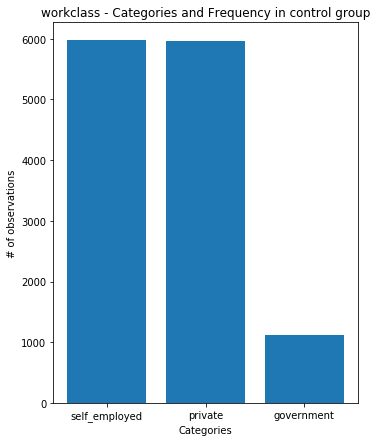

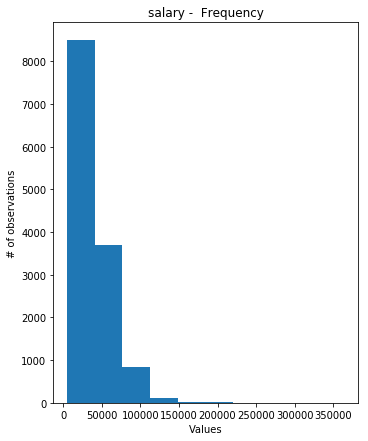

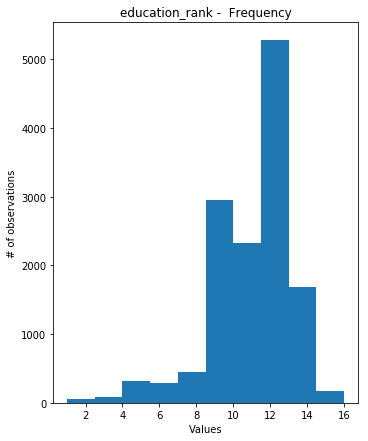

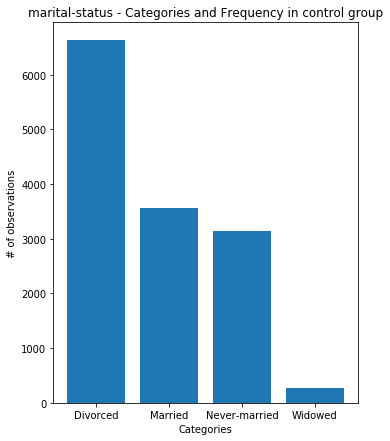

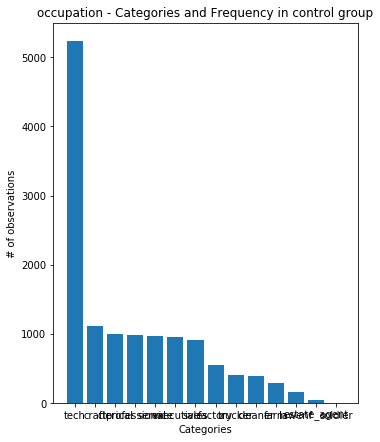

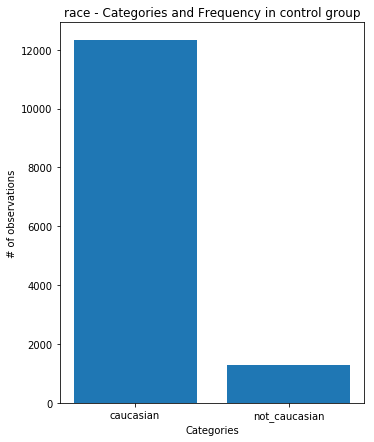

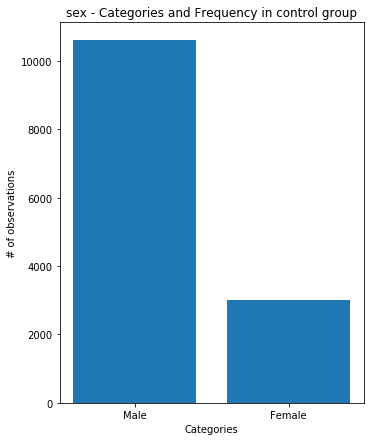

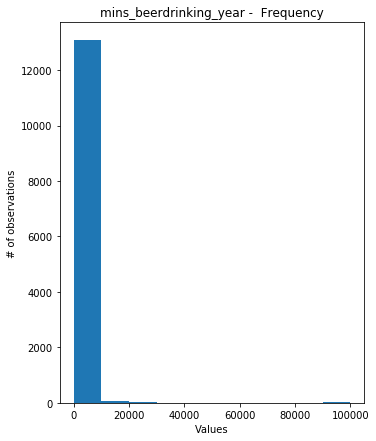

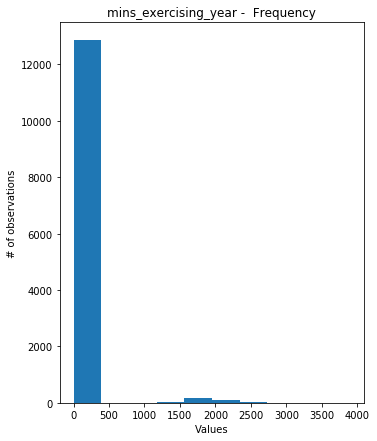

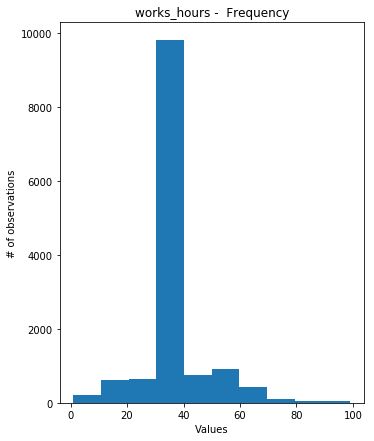

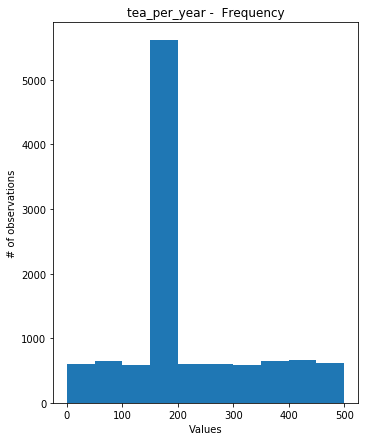

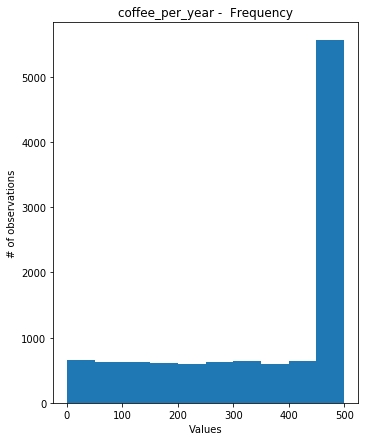

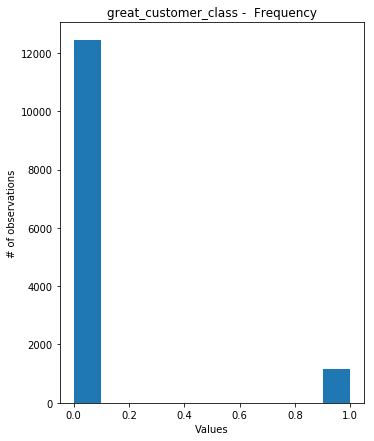

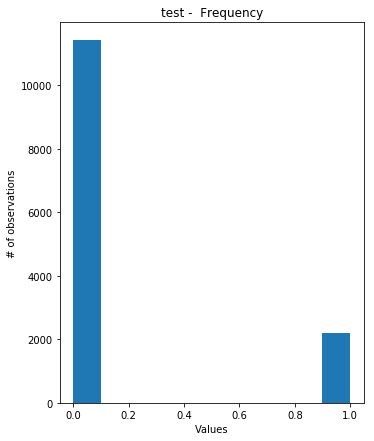

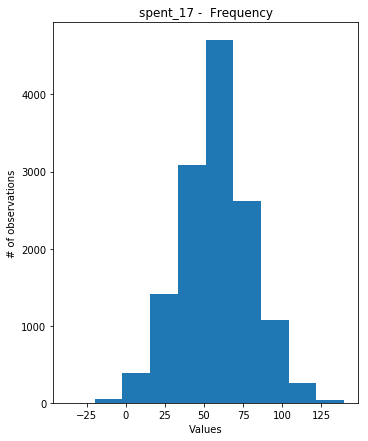

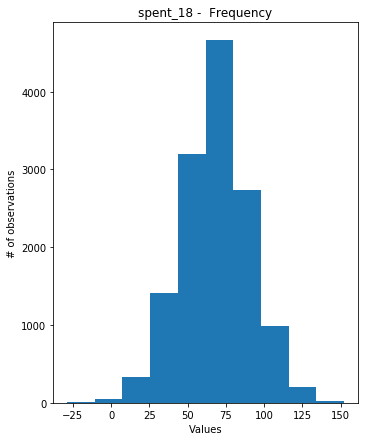

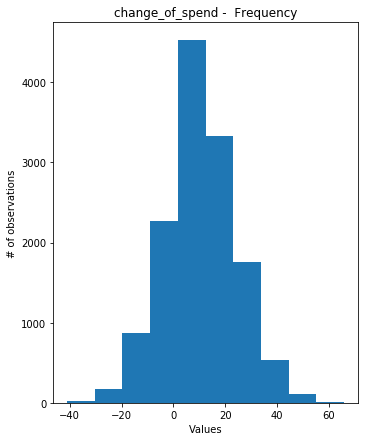

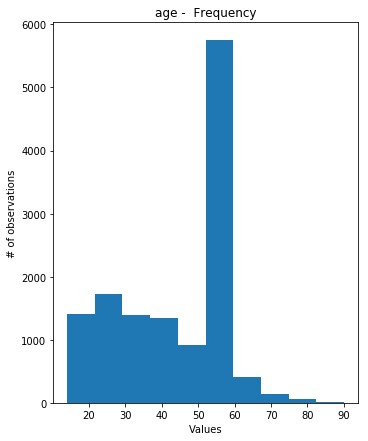

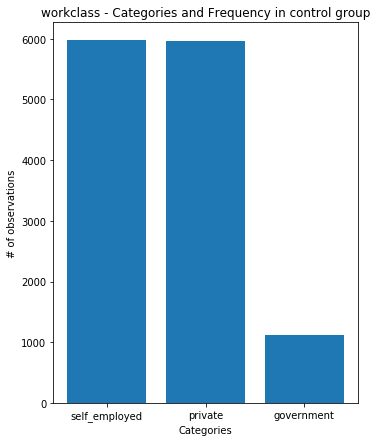

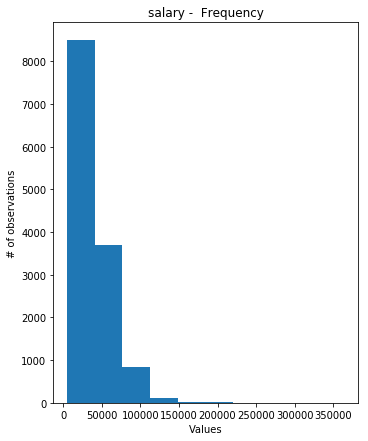

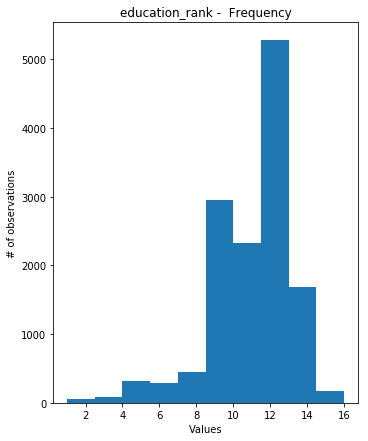

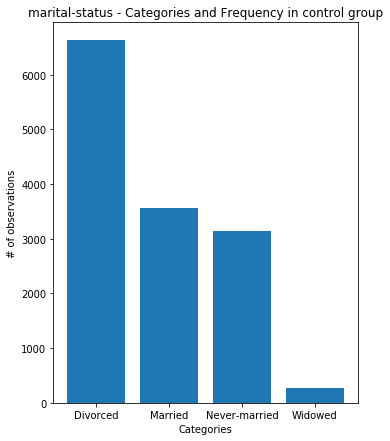

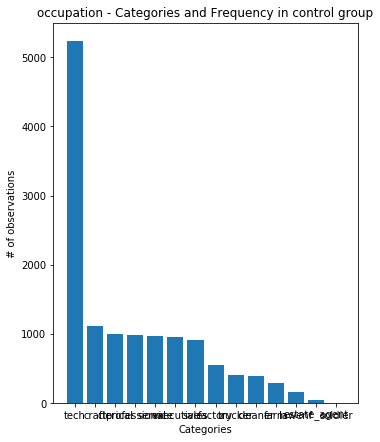

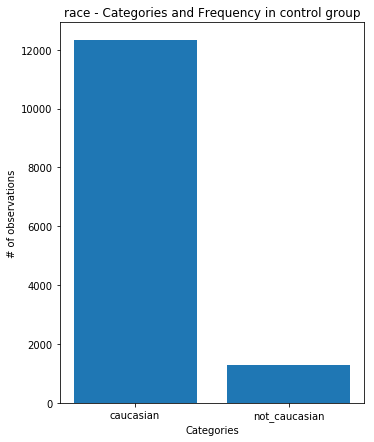

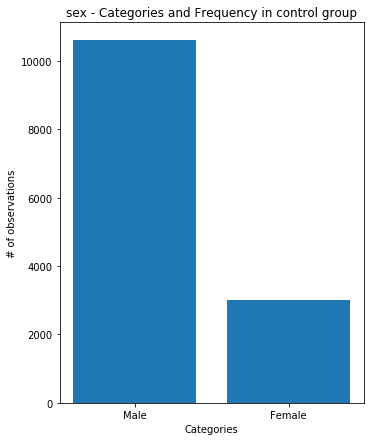

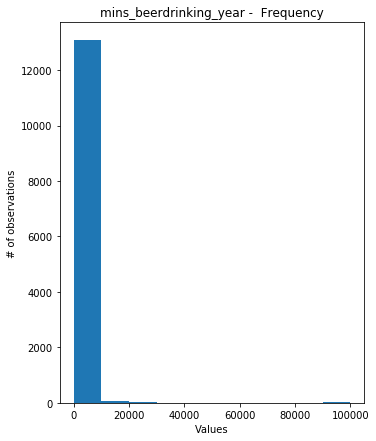

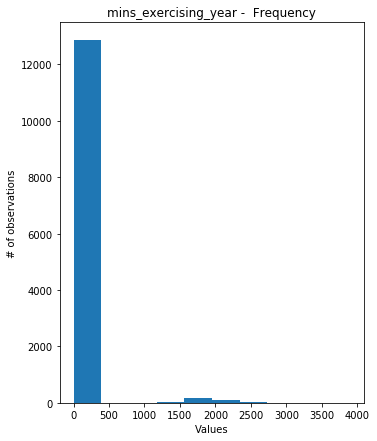

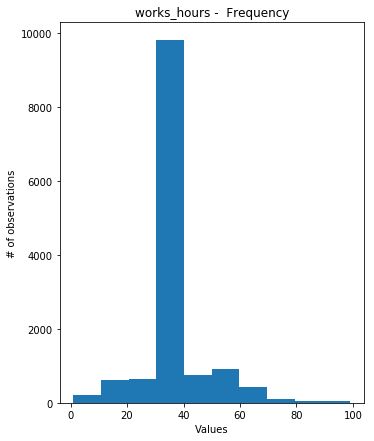

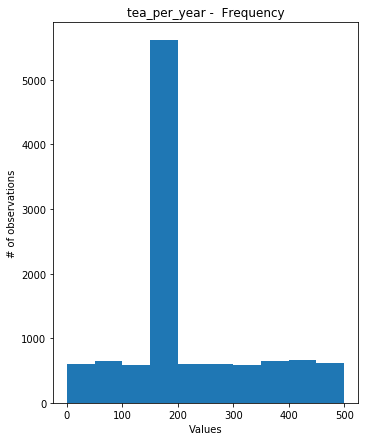

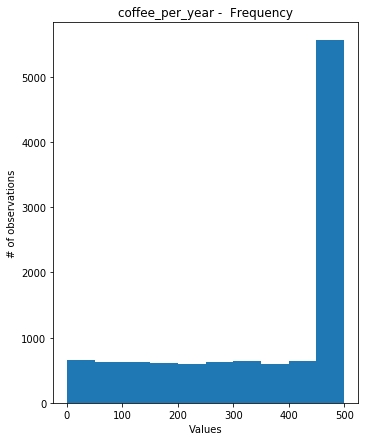

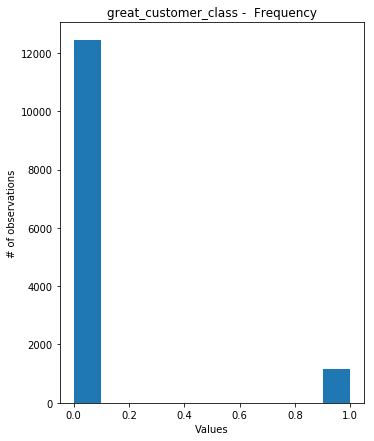

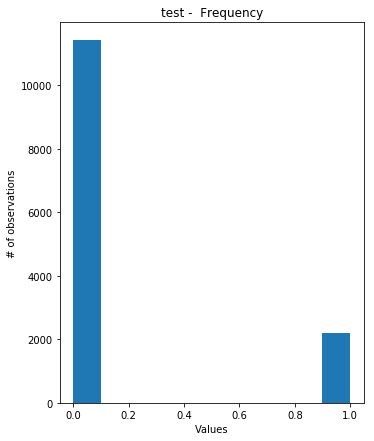

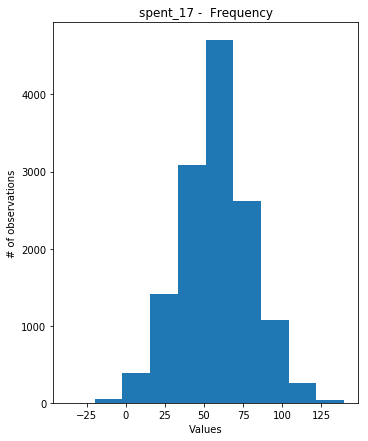

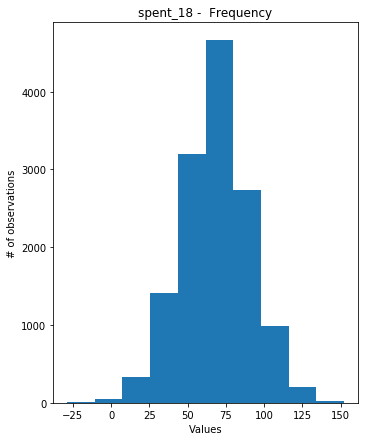

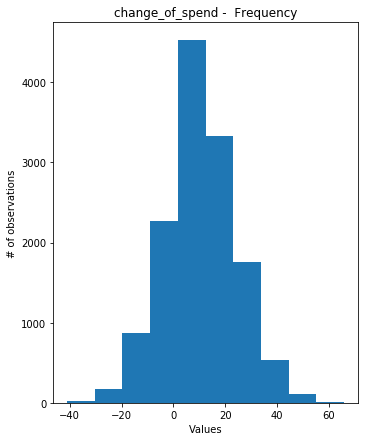

In [46]:
## compare the population in terms of different attributes
for test_groups , frames in data.groupby('test'):
    i = 1
    for column in frames:
        if frames.dtypes[column] == 'object':
            plt.figure(figsize = (12,7))
            plt.subplot(1,2, i)
            plt.title('{} - Categories and Frequency in control group'.format(column))
            plt.xlabel('Categories')
            plt.ylabel('# of observations')
            value_counts = data[column].value_counts()
            plt.bar(value_counts.index, value_counts)

        else:
            plt.figure(figsize = (12,7))
            plt.subplot(1,2,i)
            plt.title('{} -  Frequency'.format(column))
            plt.xlabel('Values')
            plt.ylabel('# of observations')
            plt.hist(data[column])

    i = i + 1

## Q3: Can you think of (a) different way(s) to leverage any suitable pre-experiment data for this test? If so, how are the results affected?


## Q4: Our personalisation experts suggested there might be subgroups among the customers for which the experiment worked better than for the rest. What kind of statistical analysis / causal modelling would you do to investigate this possibility?


## Q5: Did the campaign affect how many users reported a great customer experience?


## Q6: You learn that only about a third of all personalised messages were actually sent, but we don’t know which users received them. All sent messages were read, though. Does this change what you think about the impact of the personalised messages on spending?